In [1]:
from scipy.integrate import ode
import matplotlib.pyplot as chart
import numpy as np

In [2]:
##------------------------------------------##
#define all model constants#
##------------------------------------------##
model_constants = [-0.8033, 0.1721, -0.0206, 0.8033, -0.0206, 0.17, 0, -0.0545, 0.4545]
smc_constants = [2.2, 1.2, 1.1]
eta = [5.6, 7.2, 1.3]

In [5]:
def model(t, X):
	x1, x2, x3, x4, x5, x6 = X
	
	# if t > 15 and t < 15.5:
	# 	x1 = x1 + 10
	# 	x3 = x3 - 10

	s_phi = x2  + smc_constants[0]*x1
	s_theta = x4 + smc_constants[1]*x3
	s_psi = x6 + smc_constants[2]*x5

	u2 = (-x4*x6*model_constants[0] - model_constants[2]*x2 - eta[0]*np.tanh(s_phi))/model_constants[1]
	u3 = (-x6*x2*model_constants[3] - model_constants[4]*x4 - eta[1]*np.tanh(s_theta))/model_constants[5]
	u4 = (-x4*x2*model_constants[6] - model_constants[7]*x6 - eta[2]*np.tanh(s_psi))/model_constants[8]

	x1dot = x2
	x2dot = -eta[0]*np.tanh(s_phi)
	x3dot = x4
	x4dot = -eta[1]*np.tanh(s_theta)
	x5dot = x6
	x6dot = -eta[2]*np.tanh(s_psi)
	
	return [x1dot, x2dot, x3dot, x4dot, x5dot, x6dot]

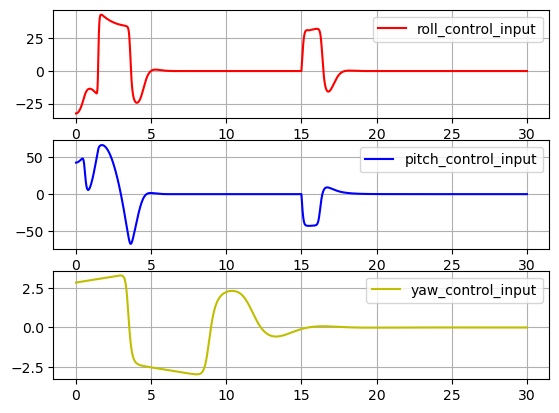

In [6]:
X0 = [10, 0, -5, 0, -12, 0]
t0 = 0
t1 = 30
dt = 0.01

r = ode(model).set_integrator('dopri5', nsteps = 5000, method = 'bdf').set_initial_value(X0, t0)

X = np.ones((3000, 6))
t = []
i = 0

while r.successful() and r.t < t1:
	r.integrate(r.t+dt)
	X[i] = r.y
	#X[i, 6] = 
	t.append(r.t)
	i = i + 1

labels = ["roll_control_input", "pitch_control_input", "yaw_control_input"]

s_phi = X[:,1]  + smc_constants[0]*X[:,0]
s_theta = X[:,3] + smc_constants[1]*X[:,2]
s_psi = X[:,5] + smc_constants[2]*X[:,4]

u2 = (-X[:,3]*X[:,5]*model_constants[0] - model_constants[2]*X[:,1] - eta[0]*np.tanh(s_phi))/model_constants[1]
u3 = (-X[:,5]*X[:,1]*model_constants[3] - model_constants[4]*X[:,3] - eta[1]*np.tanh(s_theta))/model_constants[5]
u4 = (-X[:,3]*X[:,1]*model_constants[6] - model_constants[7]*X[:,5] - eta[2]*np.tanh(s_psi))/model_constants[8]

u = [u2, u3, u4]

colors = ['r', 'b', 'y']

for i in range(3):
	chart.subplot(3, 1, i+1)
	chart.plot(t, u[i], colors[i], label=labels[i])
	chart.legend(loc='upper right')
	chart.grid()
chart.show()